In [ ]:
#univriate analysis
#bivariate analysis
#types of data
#1) numerical
#2) categorical data


In [ ]:
# deans dilemma

## importing liberaries

In [42]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame as dff
from pandas import Series
import warnings
warnings.filterwarnings('ignore')

In [43]:
sales=pd.read_csv('Desktop/education/EDA/big_mart.csv')

In [50]:
#checking for datatypes
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [44]:
#checking for null values
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [45]:
sales.shape[1]

12

In [46]:
### check the head of the data / preview of data

In [47]:
sales.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [48]:
## target variable/dependent variable -- item_outlet_sales

In [49]:
## indipendent/ predictors variables-- other then  item_outlet_sales

In [51]:
## list of number of variables #'' select_dtypes''#
nums=sales.select_dtypes(include=np.number).columns

## UNIVARIATE ANALYSIS

In [52]:
len(nums)

5

In [53]:
## creating plots with loops

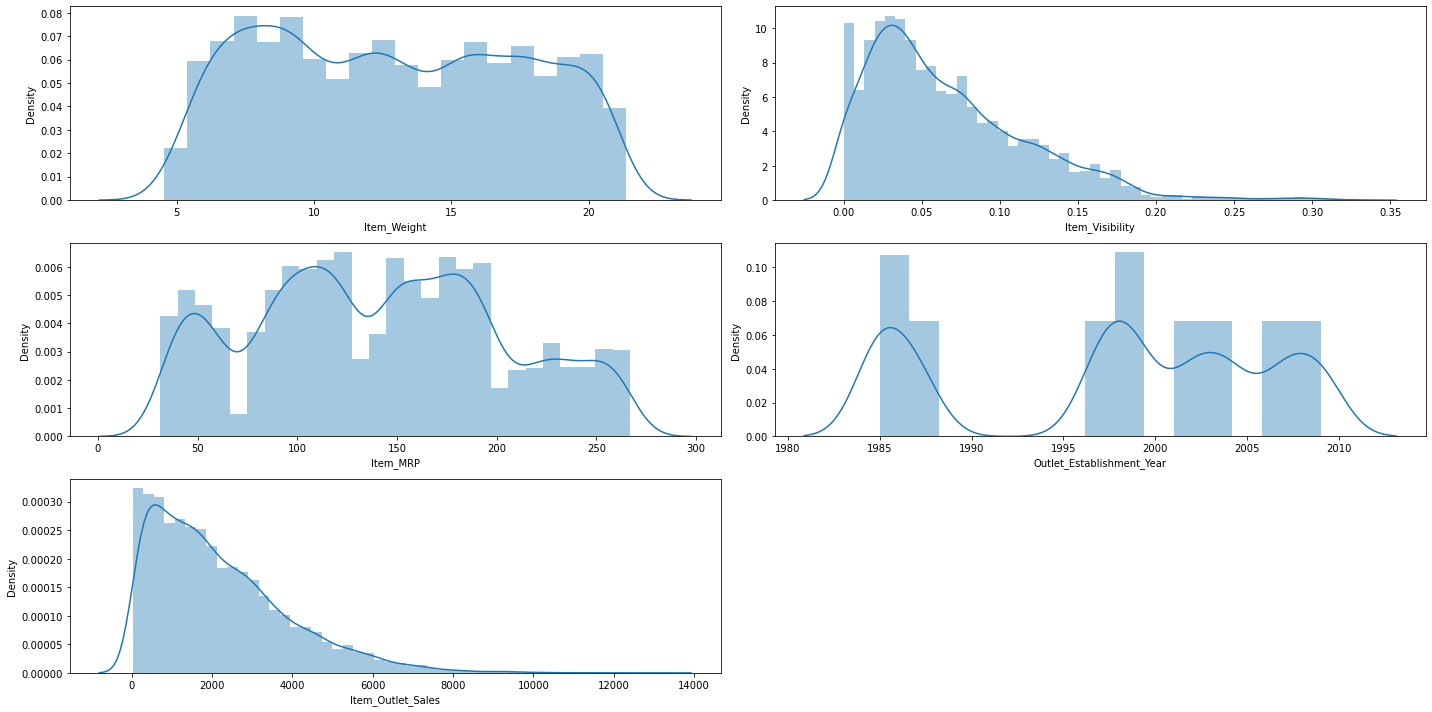

In [54]:
plt.rcParams['figure.figsize']=[20,10] ## plot dimensions

n_rows=3
n_cols=2
counter=1
for i in nums:
    plt.subplot(n_rows,n_cols,counter)
    sns.distplot(sales.loc[:, i].dropna())
    counter+=1
plt.tight_layout()

### infrences

*item outlet sales is positively skewed in nature
*no pattern seen in outlet est year
*item MRP is founf
*item weight is uniform in nature

<AxesSubplot:>

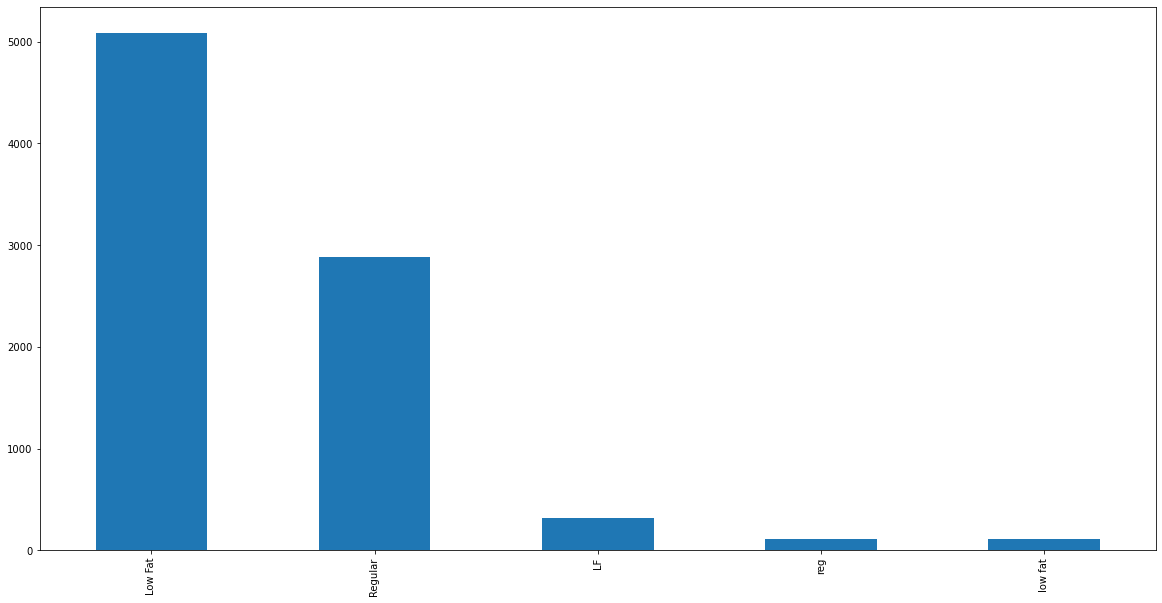

In [49]:
#item fat content
sales.Item_Fat_Content.value_counts().plot(kind='bar')

In [50]:
#replace REG and LF into the respective categories
sales.Item_Fat_Content.replace(to_replace=['LF','low fat','reg'],
                              value=['Low Fat','Low Fat','Regular'],
                              inplace=True)

<AxesSubplot:>

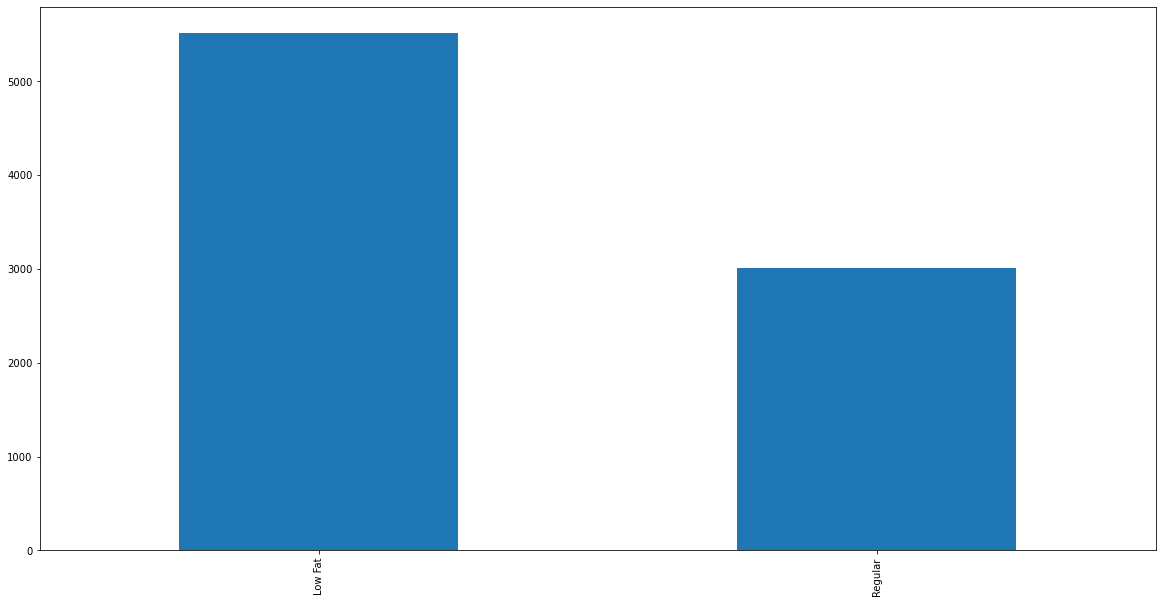

In [51]:
sales.Item_Fat_Content.value_counts().plot(kind='bar')

In [121]:
#top selling items
sales.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
## top 5 selling items
#'Fruits and Vegetables',
#'Snack Foods'
#'Household'
#'Frozen Foods'
#'Dairy'

<AxesSubplot:>

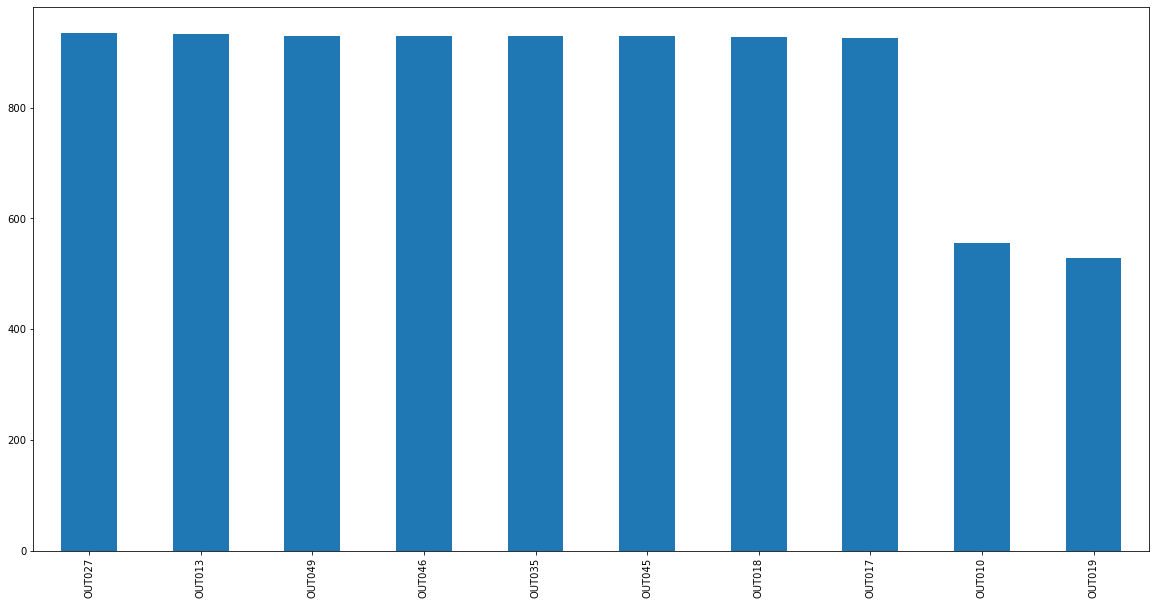

In [56]:
sales.Outlet_Identifier.value_counts().plot(kind='bar')

In [ ]:
sns.boxplot()

In [58]:
sales['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [59]:
sales.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

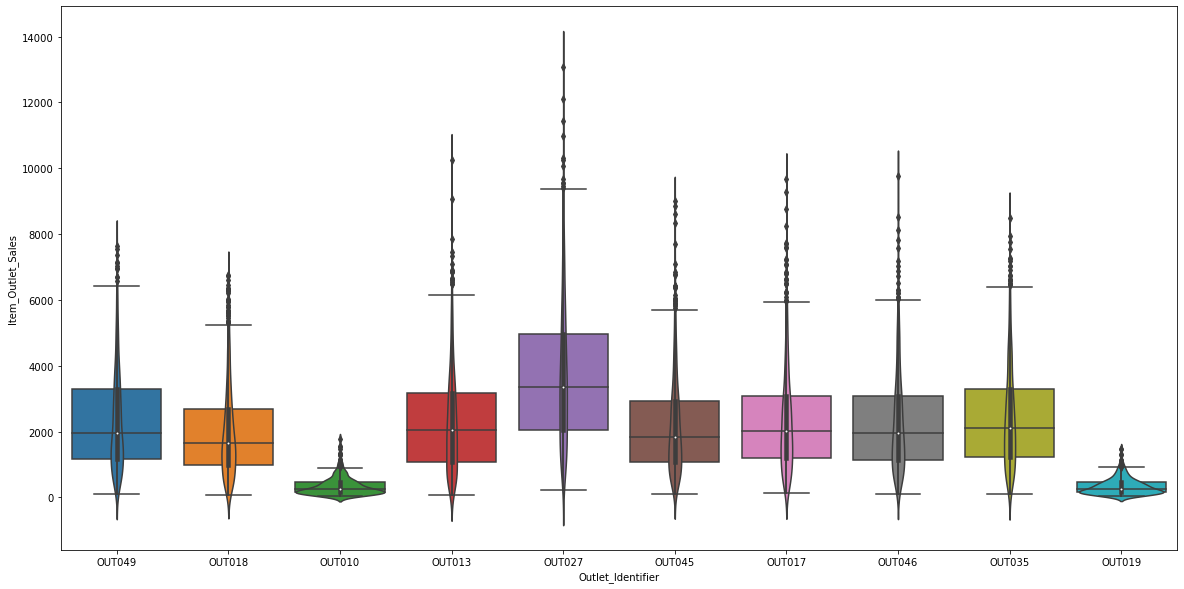

In [71]:
sales.Item_Outlet_Sales.value_counts()
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=sales) ## box plot
sns.violinplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=sales) ## voilin plot

## most performing outlet is out027

In [70]:
sales.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [73]:
sales.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

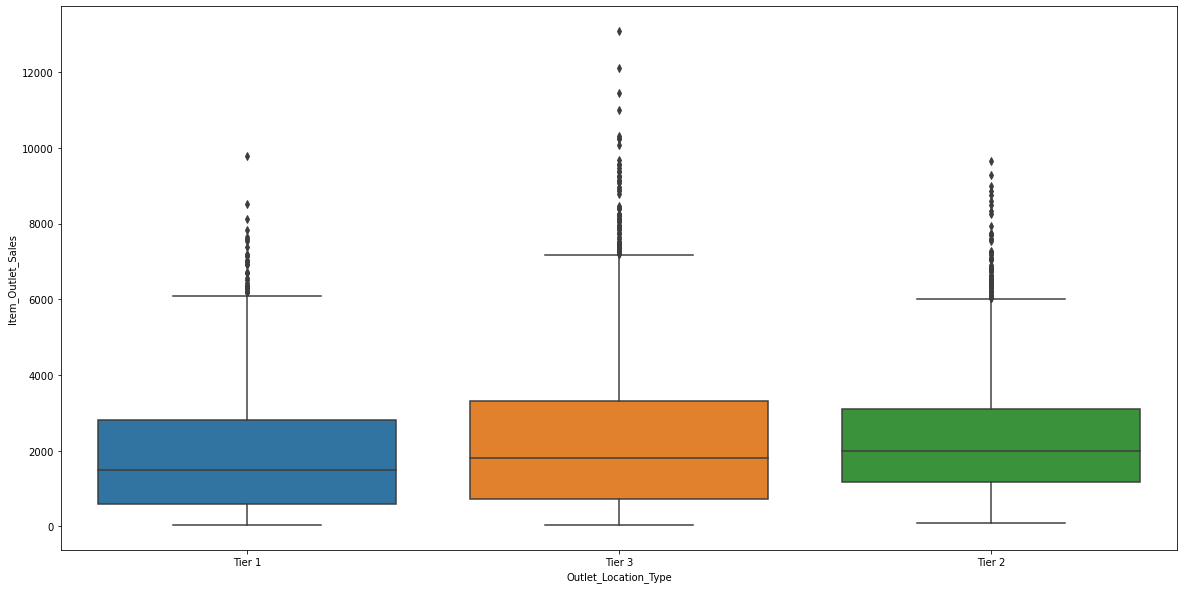

In [82]:
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=sales)

## tier 3 cities has more sales

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

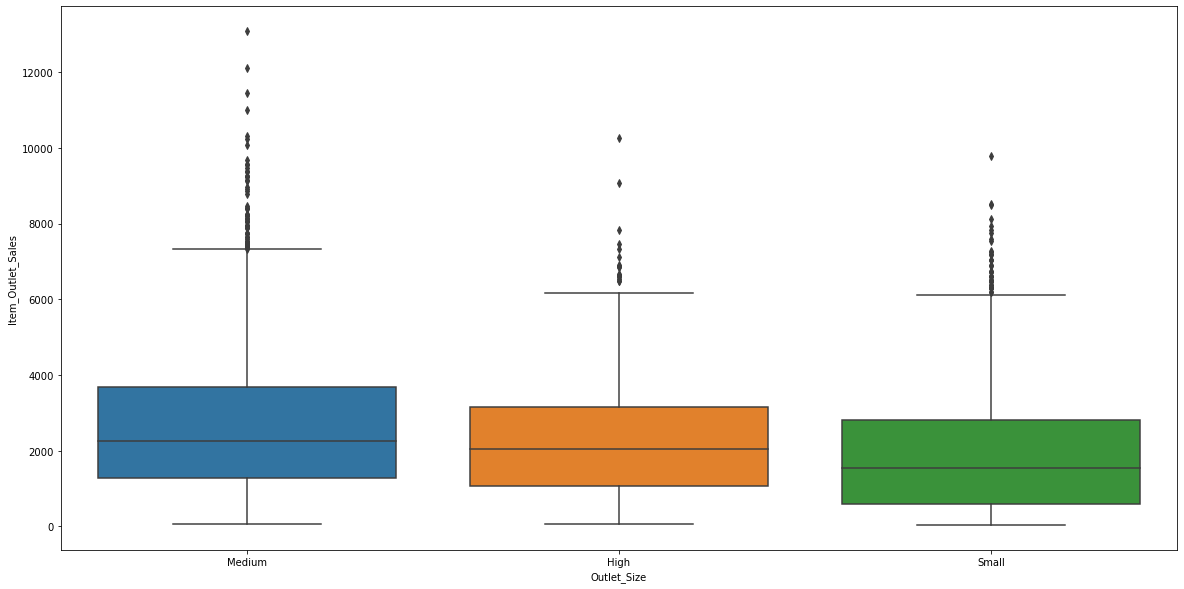

In [78]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=sales)

## medium store makes more sales

In [75]:
sales.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

## Summery univariate Analysis

* OUT027 is the maximum revenue generator for the buisness
* we realise that thus store is mostly opened in TIER 03 locations and the type of outlet is ** medium** size outlet
* the items that are sold in outlet are fruits & veggies ,snacks, frozen , houshold followed by dairy items
* most of the item are generally low fat and regular types
* lowest performing outlets are OUT010 & OUT019.
* s1 appears to the most commonly seen outlet across the locations

## EDA End TO End

* univariate analysis
* bivariate analysis
    * Num vs Num
    * Cat vs Num  - boxplot
    * Cat vs Cat
* Missing Values
* Outlier analysis and removal- Boxplot & Normal distribution
* **Feature Engineering**
* statical analysis to verify the relation between Predictor and TGT
* Data transformation and scaling  & encoding - data preprocessing stage
* **Model Building**

## Bivariate Analysis

In [84]:
# Num vs Num - sactter plot
# Item weight vs scales

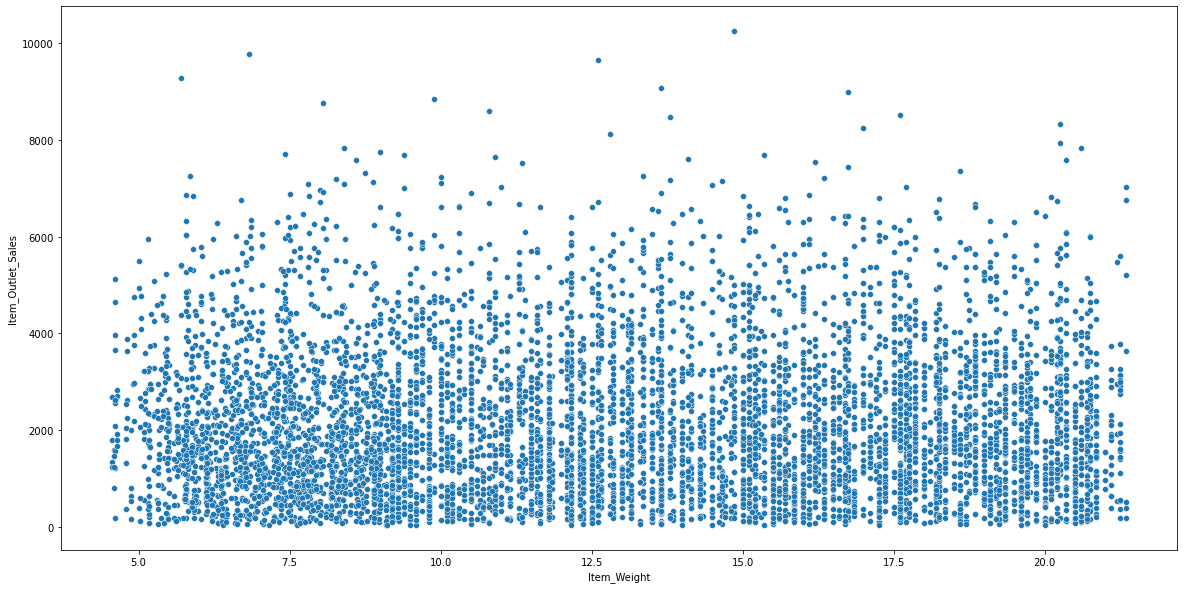

In [86]:
sns.scatterplot(sales.Item_Weight,sales.Item_Outlet_Sales)
plt.show()

In [1]:
# no insights seen

In [88]:
# check the correlation bw sales and weight
sales.loc[:,['Item_Weight','Item_Outlet_Sales']].corr()

,Item_Weight,Item_Outlet_Sales
Item_Weight,1.000000,0.014123
Item_Outlet_Sales,0.014123,1.000000


In [90]:
sales.loc[:,['Item_MRP','Item_Outlet_Sales']].corr()

,Item_MRP,Item_Outlet_Sales
Item_MRP,1.000000,0.567574
Item_Outlet_Sales,0.567574,1.000000


<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

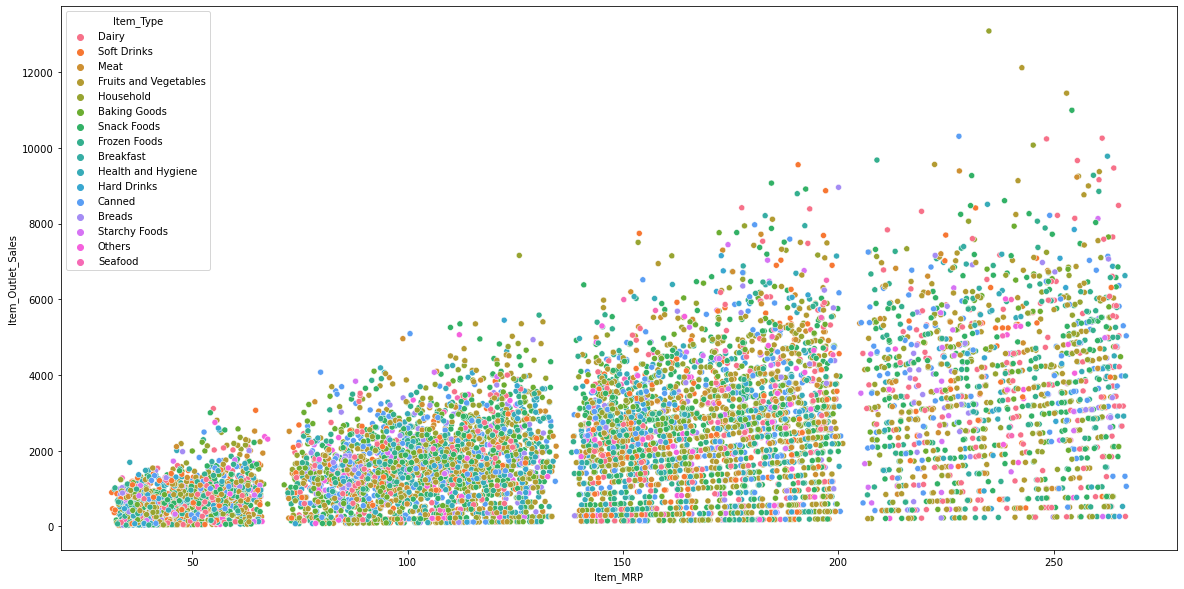

In [99]:
sns.scatterplot(sales.Item_MRP,sales.Item_Outlet_Sales,hue=sales.Item_Type) #-- cannot judge anything

In [93]:
sales.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

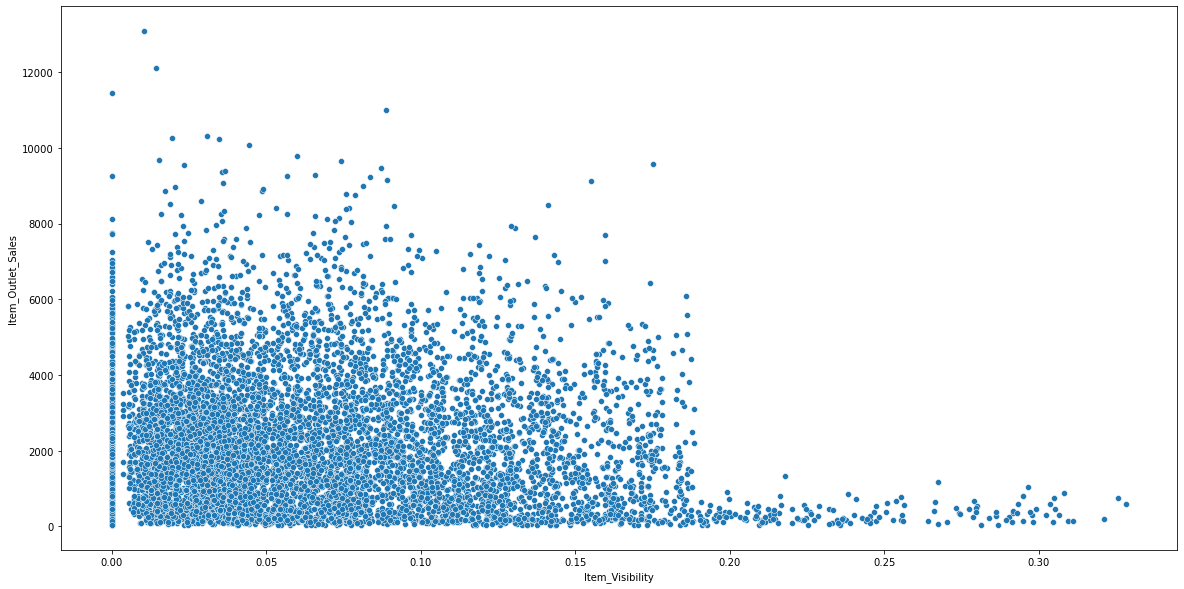

In [101]:
sns.scatterplot(sales.Item_Visibility,sales.Item_Outlet_Sales)

In [104]:
sales.loc[:,['Item_Visibility','Item_Outlet_Sales']].corr()

,Item_Visibility,Item_Outlet_Sales
Item_Visibility,1.000000,-0.128625
Item_Outlet_Sales,-0.128625,1.000000


## infrerence:
* Item Visibility vs Sales shows that as visibility increases sales decs
* item MRP vs Sales shows 4 Cluster & correlation is also good

In [107]:
corr_data=sales.loc[:, nums].corr()

<AxesSubplot:>

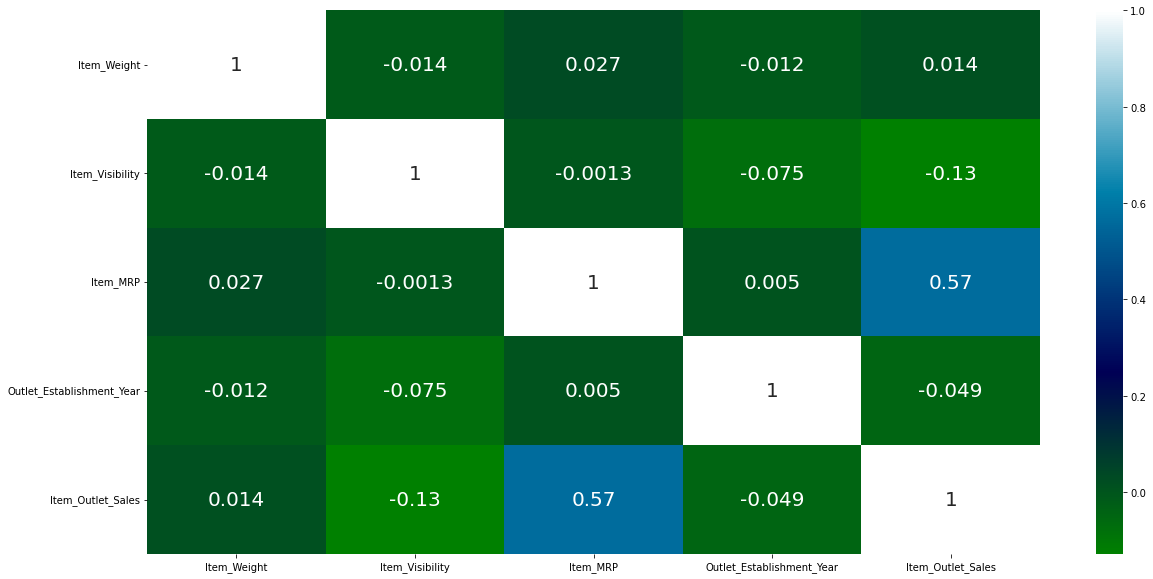

In [115]:
sns.heatmap(corr_data,annot=True,cmap='ocean',annot_kws={'size':20})

In [116]:
## Cat vs Num

In [117]:
##item type vs sales

<function matplotlib.pyplot.show(close=None, block=None)>

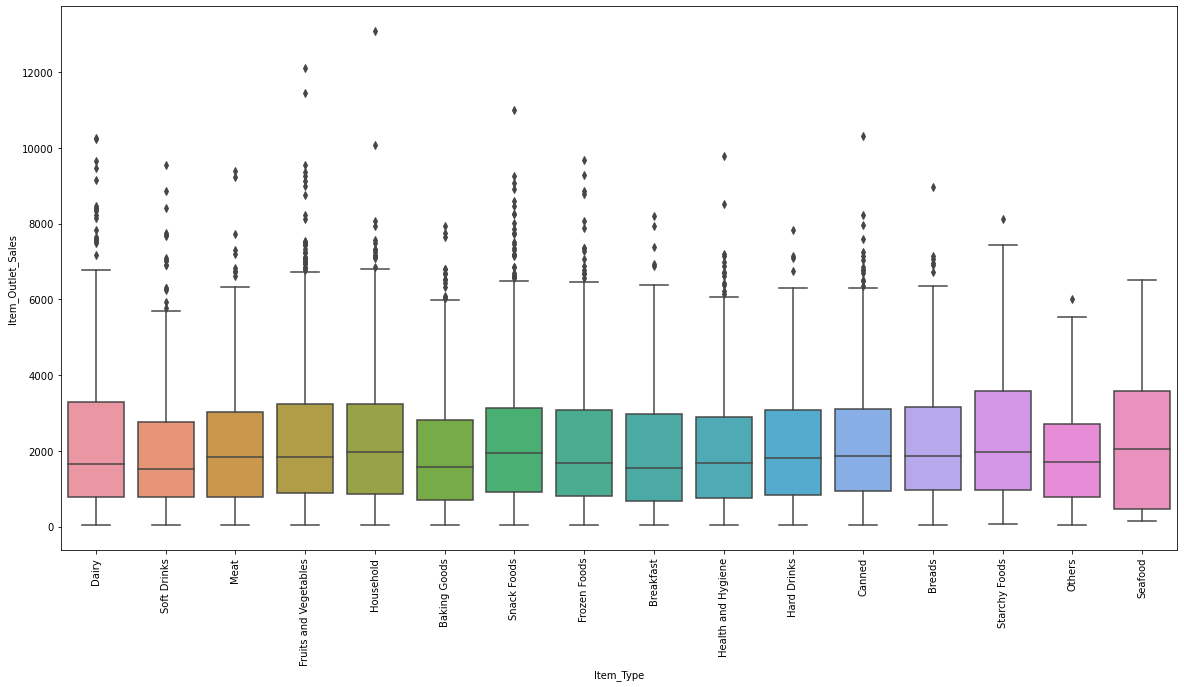

In [120]:
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=sales)
plt.xticks(rotation=90)
plt.show

In [126]:
sales.loc[sales.Item_Type=='Seafood','Item_Outlet_Sales'].describe()

count      64.000000
mean     2326.065928
std      1842.988719
min       149.805000
25%       473.383800
50%      2055.324600
75%      3589.327800
max      6503.534400
Name: Item_Outlet_Sales, dtype: float64

In [127]:
nums

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [129]:
cat=sales.select_dtypes(include=object).drop(columns='Item_Identifier').columns

In [130]:
cat

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

## Category vs Numerical 

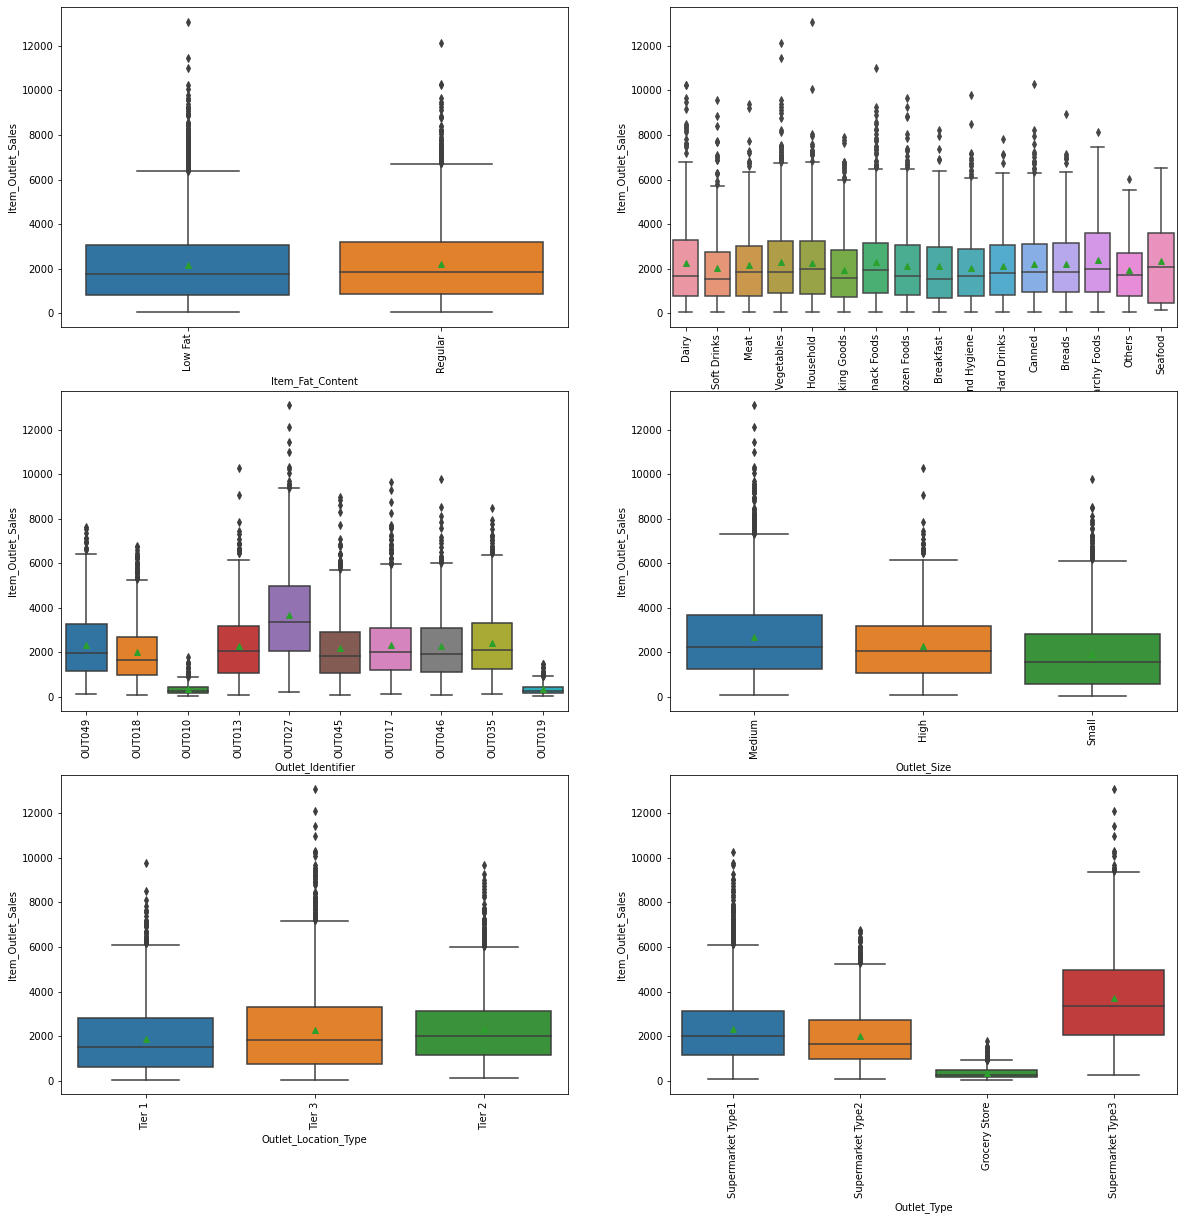

In [134]:
plt.rcParams['figure.figsize']=[20,20]
n_rows=3
n_col=2
counter=1
for i in cat:
    plt.subplot(n_rows,n_cols,counter)
    sns.boxplot(x=i,y='Item_Outlet_Sales',data=sales,showmeans=True)
    plt.xticks(rotation='90')
    counter+=1


In [135]:
## If the longer part of the box is to the right (or above) the median, the data is said to be skewed right

## Infrences of Cat vs Num Univariate
*
*
*
*
*

## STATISTICS

In [143]:
#median
sales.Item_Outlet_Sales.median()

1794.331

In [144]:
#mean
sales.Item_Outlet_Sales.mean()

2181.2889135750365

In [ ]:
## mode
sales.Item_Outlet_Sales.mode()[0]

958.752

In [155]:
# how many times this number has appeared
sales.loc[sales.Item_Outlet_Sales==sales.Item_Outlet_Sales.mode()[0],].shape

(17, 12)

In [ ]:
#mode in outlet id
sale.Outlet

## Standard Deviation
* the difference of data point from mean if taken sum is always 0

## BOX PLOT

* ANY VALUE THAT IS GREATER THEN Q3+1.5 **X** IQR IS AN OUTLIER
* ANY VALUE THAT IS LESS THEN Q3+1.5 **X** IQR IS AN OUTLIER


In [157]:
## QUANTILES
## LETS FIND THE 0.25,0.5,0.75,0.95 

In [160]:
print('25%',sales.Item_Outlet_Sales.quantile(0.25))
print('50%',sales.Item_Outlet_Sales.quantile(0.5))
print('75%',sales.Item_Outlet_Sales.quantile(0.75))
print('95%',sales.Item_Outlet_Sales.quantile(0.95))

25% 834.2474
50% 1794.331
75% 3101.2964
95% 5522.811


### Skewness


* skewness is assymteric shape of data of the data is not normal
* if the skewness is +ve it means it is right skewed
* if the skewness is either less then -1 and greater then +1 it is strongly skewed
* however, if the skewness is between the above mentioned 0.5 to 1 or -0.5 to 0 then it is modetately
skewed
* **note** the normal distribution has skewness of 0 and 0.5

In [164]:
sales.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

## kurtosis

* it is the measure if tailedness
* example of leptokurtive curve : students t-distribution,poission distribution
* if Kurt=3--> mesokurtic
* if kurt>3--> leptokurtic
* if kurt<3--> platykurtic

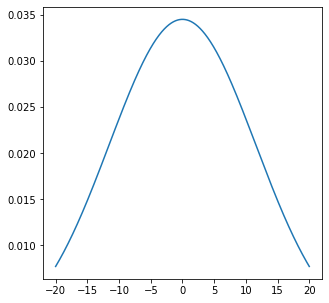

In [180]:
plt.rcParams['figure.figsize']=[5,5]

from scipy.stats import norm
import statistics
x_axis = np.arange(-20, 20, 0.01)
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()

In [177]:
pd.DataFrame(x_axis).kurt()[0]

-1.2

## Emperical rule

## Z-Score

In [ ]:
* z-score= (xi-mean)/sd
* z-score transformation. we use this scale to transform the data


In [181]:
mrp_mean=sales.Item_MRP.mean()
mrp_sd=sales.Item_MRP.std()

In [182]:
num=sales.Item_MRP-mrp_mean
zscore=num/mrp_sd

In [184]:
zscore ## mean = 0 and STD = 1 

0       1.747351
1      -1.488936
2       0.010040
3       0.660011
4      -1.399138
          ...   
8518    1.180714
8519   -0.527270
8520   -0.897155
8521   -0.607941
8522   -1.052199
Name: Item_MRP, Length: 8523, dtype: float64

In [186]:
# this is also known as standardization

In [188]:
sales.Item_Outlet_Sales

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [22]:
## one hot encoding
sales.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [26]:
perish=['Dairy', 'Meat', 'Fruits and Vegetables','Frozen Foods',
       'Breakfast','Canned',
       'Breads', 'Starchy Foods', 'Seafood']

In [38]:
def prish(i):
    if i in perish:
        return('perish')
    else:
        return('non-perish')

In [39]:
sales['Item_Cat']=sales.Item_Type.apply(prish)

In [40]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perish
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non-perish
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perish
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,perish
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,non-perish


In [41]:
sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Cat
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perish
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non-perish
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perish
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,perish
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,non-perish
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,non-perish
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,non-perish
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,non-perish
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,non-perish


## summery
* we got to scale the data first and then apply
encoding on categorical variables
* **Note: that the one hot encoded variable & label Encoded variable are
neither scaled mor transfor,ed(log,or right)
* if in original data we see a categorical column such as Gender
coded as 0 and 1 in titanic data then we need to convert the datatype of gender as object
so that when we scale the data the gender variable is not scaled
* Univ>Bivar>Missing>Outlier>feature engg>scaling&transform 
* if you have appiled standardscaler or normalizer and now you want to restore the original one then we cam apply sc.inverse_transform() to bring the data back to original state and same can be achived using minmax.inverse_tensform() for normalizer